In [2]:
import gym
import numpy as np
import time
import torch
from Reinforcement_Learning.Q_Learning.Deep_Q_Learning import QL
import matplotlib.pyplot as plt

In [2]:
env = gym.make('MountainCar-v0')
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device='cpu'
ql = QL(env, 0.0034, 0.9, buffer_size=5000, epsilon=0.1, device=device)
env.reset()
for _ in range(199):
    env.step(0)
env.step(0)[3]

c:\Users\joeag\Documents\venvs\ml-env\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


True

Episode 10000/10000: 100%|██████████| 10000/10000 [05:46<00:00, 28.85it/s, Est. Reward=-200, Est. Loss=0.0601]


Learnt Policy: <bound method QL.policy of <Reinforcement_Learning.Q_Learning.Deep_Q_Learning.QL object at 0x000002019F06FD10>>


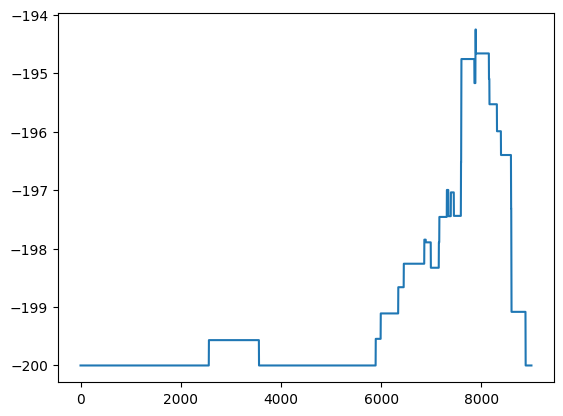

In [3]:
rewards = ql.train(10000, batch_size=32, start_training=1000, train_every=10)
print(f"Learnt Policy: {ql.policy}")

# make moving average of rewards
rewards = np.convolve(rewards, np.ones(1000), 'valid') / 1000
plt.plot(rewards)


In [4]:
env = gym.make('CartPole-v1', render_mode='human')
#  Evaluate. Max Reward = 1.0
total_rewards = []
for i in range(100):
    total_reward = 0.0
    state = env.reset()[0]
    done = False
    while not done:
        action = ql.policy(state)
        state, reward, done, _, _ =env.step(action)
        total_reward += reward
        env.render()
        time.sleep(0.01)
    total_rewards.append(reward)

print(f"mean reward: {np.array(total_rewards).mean()}")

KeyboardInterrupt: 

In [6]:
env.close()